In [3]:
import os
import io
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [4]:
STUDENT_STAT_PATH = os.getcwd()

In [5]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [71]:
def percentage_to_float(x):
    if x=='':
        return 0
    else:
        return float(x.strip('%'))/100

In [72]:
def load_attendance_data(attendance_path=STUDENT_STAT_PATH):
    csv_file = os.path.join(attendance_path, 'stud-stat-anonymous.csv')
    return pd.read_csv(csv_file, converters={'Samlet fravær':percentage_to_float, 'Fravær':percentage_to_float, 'Fravær.1':percentage_to_float, 'Fravær.2':percentage_to_float, 'Fravær.3':percentage_to_float})

In [73]:
attendance = load_attendance_data()
attendance.head()

,Unnamed: 0,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
0,0,214366,1.0,Web and Soft Electives,Big Data,1.0,NaN,0.0,NaN,0.0,NaN,0.0
1,1,680092,1.0,Web and Soft Electives,Angular,1.0,Web Security,1.0,NaN,0.0,NaN,0.0
2,2,906441,1.0,Web and Soft Electives,Angular,1.0,Web Security,1.0,NaN,0.0,NaN,0.0
3,3,432875,1.0,Web and Soft Electives,Angular,1.0,Web Security,1.0,NaN,0.0,NaN,0.0
4,4,146518,1.0,Web and Soft Electives,Angular,1.0,Web Security,1.0,NaN,0.0,NaN,0.0


In [74]:
attendance.drop("Unnamed: 0", axis=1, inplace=True)

In [13]:
type(attendance)

pandas.core.frame.DataFrame

In [14]:
attendance.head(50)

,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
0,214366,1.000,Web and Soft Electives,Big Data,1.0000,NaN,0.0000,NaN,0.0000,NaN,0.0000
1,680092,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
2,906441,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
3,432875,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
4,146518,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
5,864755,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
6,464972,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
7,728877,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
8,419492,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000
9,205702,1.000,Web and Soft Electives,Angular,1.0000,Web Security,1.0000,NaN,0.0000,NaN,0.0000


In [15]:
attendance.tail()

,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
219,803561,0.0,Web19w1,Web Development,0.0,Interface Design,0.0,Databases,0.0,NaN,0.0
220,976720,0.0,Web19w1,Web Development,0.0,Interface Design,0.0,Databases,0.0,NaN,0.0
221,172012,0.0,Web19w1,Web Development,0.0,Interface Design,0.0,Databases,0.0,NaN,0.0
222,491703,0.0,Web19w1,Web Development,0.0,Interface Design,0.0,Databases,0.0,NaN,0.0
223,532264,0.0,Web19w1,Web Development,0.0,Interface Design,0.0,Databases,0.0,NaN,0.0


In [16]:
attendance.sample()

,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
104,463299,0.348,Web and Soft Electives,Big Data,0.2273,Databases,0.0,Test,0.4286,NaN,0.0


In [25]:
attendance[attendance.Klasse=="Web19w1"]

,Id,Samlet fravær,Klasse,Fag,Fravær,Fag.1,Fravær.1,Fag.2,Fravær.2,Fag.3,Fravær.3
32,751804,0.862,Web19w1,Web Development,0.5556,Interface Design,1.0000,Databases,1.0,NaN,0.0
54,530097,0.552,Web19w1,Web Development,0.2222,Interface Design,0.7222,Databases,0.5,NaN,0.0
60,153731,0.517,Web19w1,Web Development,0.3333,Interface Design,0.6667,Databases,0.0,NaN,0.0
66,546140,0.483,Web19w1,Web Development,0.6667,Interface Design,0.3889,Databases,0.5,NaN,0.0
67,614503,0.483,Web19w1,Web Development,0.1111,Interface Design,0.6667,Databases,0.5,NaN,0.0
68,443095,0.483,Web19w1,Web Development,0.2222,Interface Design,0.6667,Databases,0.0,NaN,0.0
69,703392,0.483,Web19w1,Web Development,0.1111,Interface Design,0.6667,Databases,0.5,NaN,0.0
70,207562,0.483,Web19w1,Web Development,0.2222,Interface Design,0.6667,Databases,0.0,NaN,0.0
86,636158,0.414,Web19w1,Web Development,0.0000,Interface Design,0.6667,Databases,0.0,NaN,0.0
87,305265,0.414,Web19w1,Web Development,0.0000,Interface Design,0.6667,Databases,0.0,NaN,0.0


In [17]:
attendance[attendance["Klasse"]=="Web19w1"][["Samlet fravær", "Fag"]].head()

,Samlet fravær,Fag
32,0.862,Web Development
54,0.552,Web Development
60,0.517,Web Development
66,0.483,Web Development
67,0.483,Web Development


In [18]:
all_cols = attendance.columns.tolist()

In [19]:
transform_func = dict(Fag=attendance.filter(regex="^Fag").columns, Fravær=attendance.filter(regex="^Fravær").columns)

In [20]:
transform_func

{'Fag': Index(['Fag', 'Fag.1', 'Fag.2', 'Fag.3'], dtype='object'),
 'Fravær': Index(['Fravær', 'Fravær.1', 'Fravær.2', 'Fravær.3'], dtype='object')}

In [21]:
transformed_attendance = pd.lreshape(attendance, transform_func)

In [28]:
transformed_attendance.tail(50)

,Id,Klasse,Samlet fravær,Fag,Fravær
595,460452,SD18i,0.057,Data Science,0.0000
596,643901,SD19w1,0.051,Data Science,0.0000
597,296996,SD19w1,0.051,Data Science,0.0000
598,610938,SD19w1,0.048,Software Design Patterns,0.0000
599,295223,SD18i,0.046,Data Science,0.0000
600,330334,Web19w1,0.034,Databases,0.0000
601,664331,Web19w1,0.034,Databases,0.0000
602,710120,ITS18a,0.031,Security Engineering,0.0000
603,214327,ITS18a,0.031,Security Engineering,0.0000
604,239722,ITS18a,0.031,Security Engineering,0.0000


In [32]:
transformed_attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
Id               645 non-null int64
Klasse           645 non-null object
Samlet fravær    645 non-null float64
Fag              645 non-null object
Fravær           645 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 25.3+ KB


In [33]:
transformed_attendance.describe()

,Id,Samlet fravær,Fravær
count,645.000000,645.000000,645.000000
mean,534775.551938,0.372572,0.338131
std,242780.289801,0.306235,0.356557
min,104328.000000,0.000000,0.000000
25%,301757.000000,0.106000,0.000000
50%,579153.000000,0.287000,0.222200
75%,710120.000000,0.530000,0.575800
max,994560.000000,1.000000,1.000000


In [34]:
type(transformed_attendance)

pandas.core.frame.DataFrame

In [37]:
len(transformed_attendance)/5

129.0

In [41]:
first_part = int(len(transformed_attendance)/5)
sub_transformed_attendance_1 = transformed_attendance[:first_part]
len(sub_transformed_attendance_1)

129

In [51]:
dir(sub_transformed_attendance)

['Fag',
 'Fravær',
 'Id',
 'Klasse',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '_

In [43]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [35]:
x = transformed_attendance.iloc[:, [2, 4]].values

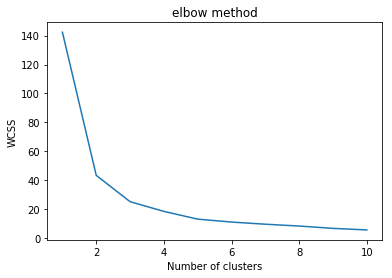

In [48]:
wcss = [] 
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=5, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=5, random_state=0)
y_kmeans=kmeans.fit_predict(x)
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1
 1 1 4 1 1 1 1 1 1 1 1 1 2 2 1 1 1 4 1 1 1 4 1 3 1 1 3 1 1 1 4 4 4 4 1 1 1
 1 3 1 1 3 1 1 1 1 3 1 1 4 4 4 4 4 1 3 1 1 4 3 1 3 1 1 3 3 3 3 3 4 3 1 4 1
 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 0 3 3 0 3 0 3 0 0 0 0 0 0 3 0 0 0 0 3
 3 3 0 0 0 3 0 3 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 0 0 0 3 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 4 4 2 2 2 4 2
 2 4 1 1 2 2 1 1 4 4 1 2 1 4 4 1 4 1 1 1 4 4 4 4 1 3 4 1 4 3 3 1 1 1 1 4 3
 3 4 1 4 4 4 3 3 4 3 1 4 3 1 1 1 1 1 4 4 3 4 4 4 4 3 4 4 3 3 4 4 3 3 3 4 4
 4 0 0 3 3 3 0 0 0 3 3 0 3 0 3 0 0 0 0 0 3 1 0 3 0 0 3 3 3 3 3 3 0 0 0 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 4
 1 1 3 4 3 3 1 4 1 1 4 1 

Text(0.5, 1.0, 'culster of subjects')

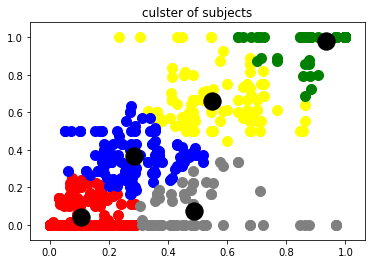

In [66]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='blue', label='Cluster 4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='grey', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('culster of subjects')

In [ ]:
https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03